In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Table
1. [Curve with variance](#curve_with_variance)
2. [Polar heatmap with points](#polar_heatmap_with_points)

<a id='curve_with_variance'></a>

In [2]:
def plot_curve_with_variance(ax, x, y, color, smooth=False):
    """
    Plot a curve with variance bounds.
    
    :param ax: axes object of matplotlib.pyplot
    :param x: x data, shape=(num_samples,)
    :param y: y data, shape=(num_samples, num_values)
    :param color: color of the curve
    :param smooth: smooth the curve or not
    :return: None
    """
    mean, var = np.mean(y, axis=1), np.var(y, axis=1)
    top, bottom = mean - var, mean + var
    
    if smooth:
        top_spl, bottom_spl = splrep(x, top), splrep(x, bottom)
        x = np.arange(np.min(x), np.max(x), 0.01)
        top, bottom = splev(x, top_spl), splev(x, bottom_spl)
        mean = (top + bottom) / 2

    ax.fill_between(x, top, bottom, alpha=0.1, color=color)
    ax.plot(x, mean, color=color)

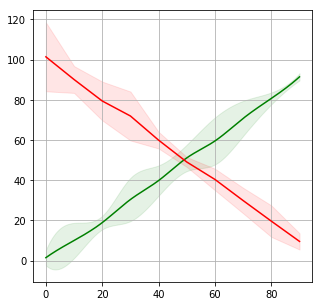

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
x = np.arange(0, 100, 10)
y = np.asarray([np.random.normal(loc=_x, scale=3, size=(10,)) for _x in x])
plot_curve_with_variance(ax, x, y, 'g', smooth=True)

x = np.arange(0, 100, 10)
y = np.asarray([np.random.normal(loc=100 - _x, scale=3, size=(10,)) for _x in x])
plot_curve_with_variance(ax, x, y, 'r', smooth=False)
plt.grid(True)
plt.show()

<a id='polar_heatmap_with_points'></a>

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ -0.5   9.5  19.5  29.5  39.5  49.5  59.5  69.5  79.5  89.5  99.5 109.5
 119.5 129.5 139.5 149.5 159.5 169.5 179.5 189.5 199.5 209.5 219.5 229.5
 239.5 249.5 259.5 269.5 279.5 289.5 299.5 309.5 319.5 329.5 339.5 349.5
 359.5]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[  5  15  25  35  45  55  65  75  85  95 105 115 125 135 145 155 165 175
 185 195 205 215 225 235 245 255 265 275 285 295 305 315 325 335 345 355]


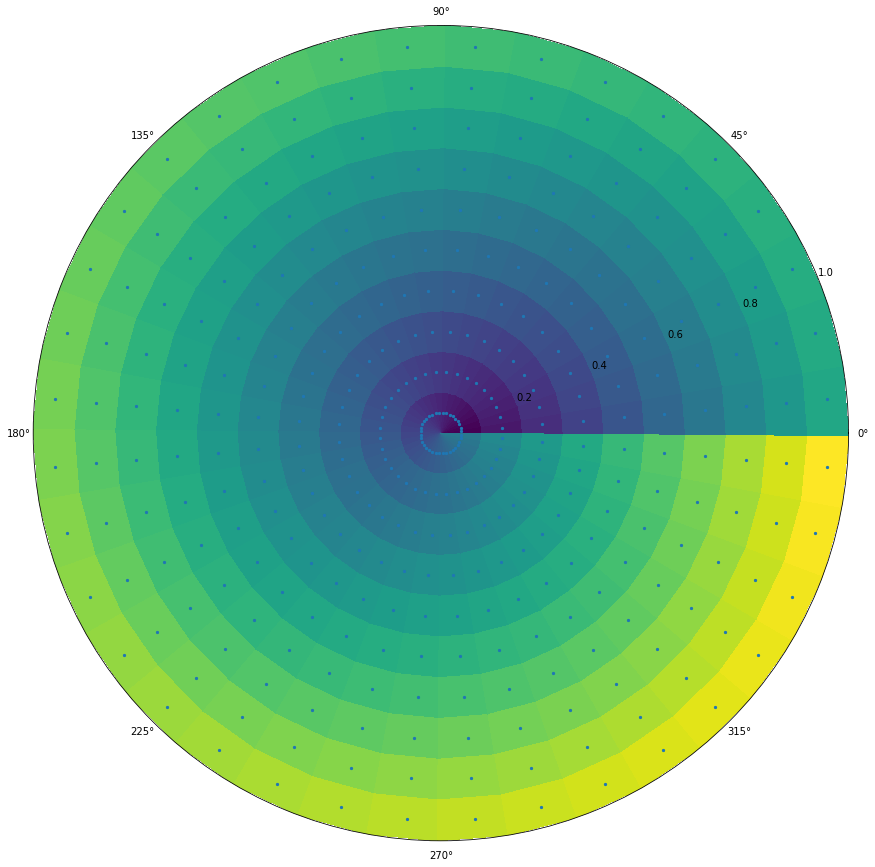

In [28]:
fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(15, 15))
rad = np.linspace(0, 1, 11)
print(rad)
azm = np.linspace(-0.5 * np.pi / 180, 359.5 / 180 * np.pi, 37)
print(azm * 180 / np.pi)
r, a = np.meshgrid(rad, azm)
z = r * 10 + a
ax.pcolormesh(a, r, z)

rad = np.arange(0.05, 1, 0.1)
print(rad)
azm = np.arange(5, 360, 10)
print(azm)
r, a = np.meshgrid(rad, azm * np.pi / 180)
ax.scatter(a, r, s=5)
ax.set_rmax(1)
plt.show()